In [1]:
%matplotlib inline
from fermi_model import *
states3 = csv_to_states()

In [2]:
equ = False
Te = 0.5
ne = 0.00001
fermi3 = Fermi(states3, equ=equ, Te=Te, ne=ne)
states = fermi3.states

scores, population = fermi3.get_population(use_power=True)

In [3]:
# ある状態における、基底状態の電子配置と違う位置に配置された電子の個数を返す
def diff_from_ground(state: State):
    ground = [i for i in range(State.n)]
    return  len(set([*ground, *state.v])) - State.n

In [4]:
scores_1 = []
scores_2 = []
scores_3 = []

population_1 = []
population_2 = []
population_3 = []

for state, pop in zip(fermi3.states, population):
    if diff_from_ground(state) == 1:
        scores_1.append(state.score)
        population_1.append(pop)
    elif diff_from_ground(state) == 2:
        scores_2.append(state.score)
        population_2.append(pop)
    if diff_from_ground(state) == 3:
        scores_3.append(state.score)
        population_3.append(pop)

In [37]:
# x軸の作成
scores_ordered_set = sorted([*set(scores)])


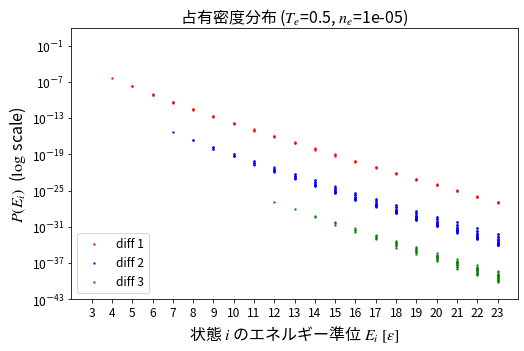

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(scores_1, population_1, label=f"diff 1", s=2, color="red", alpha=0.8)
plt.scatter(scores_2, population_2, label=f"diff 2", s=2, color="blue", alpha=0.8)
plt.scatter(scores_3, population_3, label=f"diff 3", s=2, color="green", alpha=0.8)
plt.yscale("log")
# plt.xlabel(r"$E_i$ $[\epsilon]$", fontsize=16)
plt.xlabel(r"状態 $i$ のエネルギー準位 $E_i$ $[\epsilon]$", fontsize=16)
plt.ylabel(r"$P(E_i)$  ($\log$ scale)", fontsize=16)
plt.ylim([1e-43, 100])
plt.xlim([2, 24])
plt.xticks(scores_ordered_set)
# plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.legend(loc="lower left")
plt.title(fr"占有密度分布 ($T_e$={Te}, $n_e$={ne})", fontsize=16)
plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

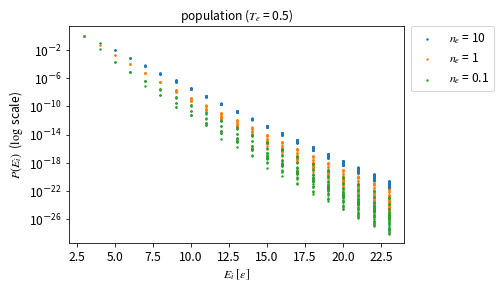

In [33]:
plots_poplulation([10, 1, 0.1], include_equ=False, use_power=True)

  0%|          | 0/1 [00:00<?, ?it/s]

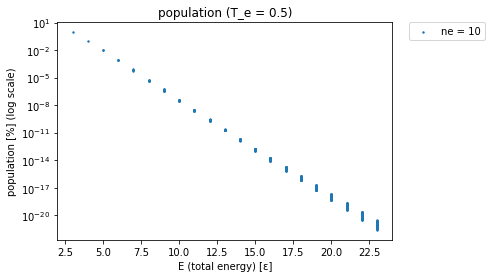

In [45]:
plots_poplulation([10], include_equ=False, use_power=True)

  0%|          | 0/1 [00:00<?, ?it/s]

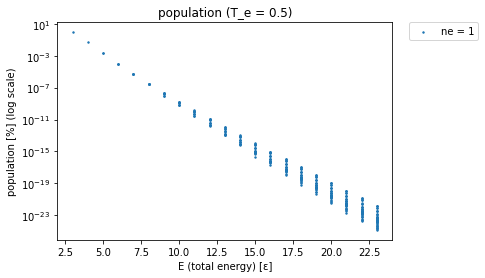

In [46]:
plots_poplulation([1], include_equ=False, use_power=True)

  0%|          | 0/1 [00:00<?, ?it/s]

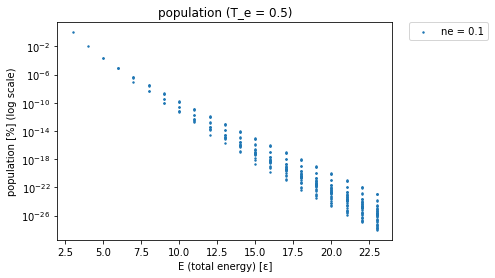

In [47]:
plots_poplulation([0.1], include_equ=False, use_power=True)